# Search: Solving a Maze Using a Goal-based Agent

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [1]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [2]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

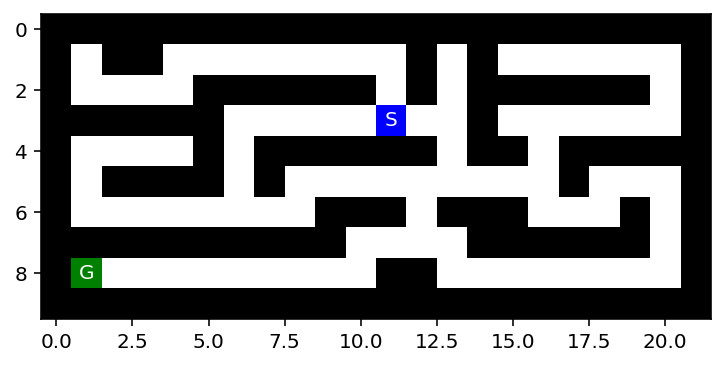

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_goals(maze)
    
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /Users/evelynxu/CS7320-AI/Search/maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [6]:
class Node:
    w = 10
    
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)
    
    # f(n) = h(n)
    def manhattan_distance(self,maze):
        return abs(self.pos[0] - maze.goal[0][0]) + abs(self.pos[1] - maze.goal[0][1])
    
    # f(n) = g(n) + h(n)
    def g_h(self,maze):
        return self.cost + self.manhattan_distance(maze)
    
    # f(n) = g(n) + W * h(n)
    def g_wh(self, maze):
        return self.cost + Node.w * self.manhattan_distance(maze)
    
    def set_w(weight):
        Node.w = weight
    
    

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

#### Your answer goes here
- Initial state: a maze with a start point and a goal point 
- Actions: [north,south,west,east]
- Transition model: result(S,A)=>S'</br>action N/S/W/E move the agent to an adjacent not-wall square represented by a new x/y coordinate. Return a path from the root to current node.
- Goal state: find a path from start point to goal point
- Path cost: number of steps

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

# Your answer goes here
- n: all of possible path with different steps
- d: number of steps of path of the optimal path
- m: number of steps of longest path
- b: maxium number of different path(branch)

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [7]:
# Your code goes here
import maze_helper as mh

class Maze:
    def __init__(self,maze_str):
        self.maze = mh.parse_maze(maze_str)
        self.initial = mh.find_pos(self.maze, what = "S")
        
        # self.goal = mh.find_pos(self.maze, what = "G")
        
        ## For IDS
        # self.goal = []
        # goal_temp = mh.find_pos(self.maze, what = "G")
        # while goal_temp and goal_temp not in self.goal:
            # self.goal.append(goal_temp)
            
        # But the find_pos function only return the first one of all found postion
        # Need to modify maze_helper.py
        
        # By adding following code to maze_helper.py
        # def find_goals(maze):
        #     pos = np.where(maze == "G")
        #     res = []
        #     for x in range(len(pos[0])):
        #         res.append((pos[0][x],pos[1][x]))
        #     return res
        self.goal = mh.find_goals(self.maze)
    
    def Is_goal(self,state):
        # if state == self.goal:
        # For IDS
        if state in self.goal:
            return True
        else:
            return False
        
    def Actions(self,state):
        res = []
        if self.maze[state[0]-1,state[1]] != "X":
            res.append("north")
        if self.maze[state[0]+1,state[1]] != "X":
            res.append("south")
        if self.maze[state[0],state[1]-1] != "X":
            res.append("west")
        if self.maze[state[0],state[1]+1] != "X":
            res.append("east")
        if len(res) == 0:
            print("Got Stuck")
            return False
        return res
    
    def Result(self,state,action):
        if action == "north":
            state = (state[0] - 1,state[1])
        elif action == "south":
            state = (state[0] + 1,state[1])
        elif action == "west":
            state = (state[0],state[1] - 1)
        elif action == "east":
            state = (state[0],state[1] + 1)
        return state
    
    # Set maze type(Frontier, Explored, Path)
    def Set_maze(self,state,type):
        self.maze[state] = type
    
    def Show(self):
        mh.show_maze(self.maze)
    

In [8]:
# import sys
import queue

def Expand(maze,node):
    s = node.pos
    for action in maze.Actions(s):
        # result(S,A) => S'
        s_tmp = maze.Result(s,action)
        cost = len(node.get_path_from_root()) + 1
        node_tmp = Node(s_tmp,node,action,cost)
        # print(node_tmp)
        yield node_tmp
    
    
def bfs(maze):
    node = Node(maze.initial,None,None,0)
    # print(node)
    if maze.Is_goal(node.pos):
        return node
    frontier = [node]
    reached = {node.pos:node}
    
    # Attributes used to compare with other search
    node_expanded = 1
    max_tree_depth = 1
    max_frontier_size = 1
    
    while len(frontier) != 0:
        node = frontier.pop(0)
        
        # Set maze type
        if node.pos != maze.initial and node.pos not in maze.goal:
            maze.Set_maze(node.pos,".")
        
        # Expand
        for child in Expand(maze,node):
            s = child.pos
            
            # Whether found goal state?
            if maze.Is_goal(s):
                
                max_tree_depth = max(max_tree_depth, child.cost)
                
                # Set maze type
                for node in child.get_path_from_root():
                    if node.pos != maze.initial and node.pos not in maze.goal:
                        maze.Set_maze(node.pos,"P")
                        
                # return child
                return [node.cost,node_expanded,max_tree_depth,len(reached),max_frontier_size]
            
            # Wherther reached?
            if s not in reached:
                reached[s] = child
                frontier.append(child)
                # Set maze type
                if child.pos != maze.initial and child.pos not in maze.goal:
                    maze.Set_maze(s,"F")
                
                # Set attribute
                node_expanded += 1
                max_tree_depth = max(max_tree_depth, child.cost)
                max_frontier_size = max(max_frontier_size, len(frontier))
                
                
    return "Fail"


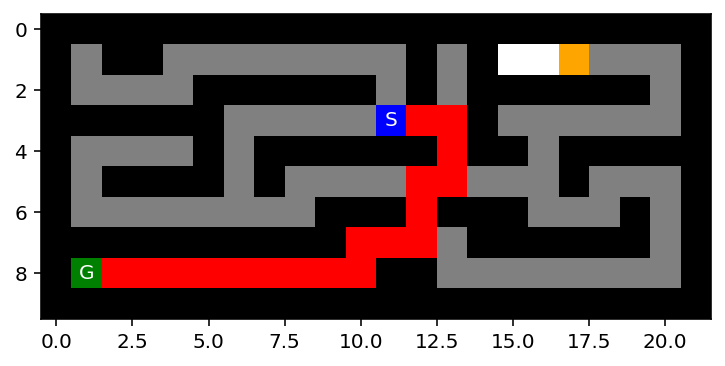

[20, 91, 20, 91, 8]

In [9]:
f1 = "small_maze.txt"
f2 = "medium_maze.txt"
f3 = "large_maze.txt"
f4 = "open_maze.txt"
f5 = "empty_maze.txt"
f6 = "empty_2_maze.txt"
f7 = "wall_maze.txt"
f8 = "loops_maze.txt"


def Search(file,function): 
    f = open(file,"r")
    maze_str = f.read()
    maze = Maze(maze_str)
    attribute = function(maze)
    maze.Show()
    return attribute

Search(f1,bfs)
# Search(f2,bfs)
# Search(f3,bfs)
# Search(f4,bfs)
# Search(f5,bfs)
# Search(f6,bfs)
# Search(f7,bfs)
# Search(f8,bfs)

In [10]:
import sys
LIMIT = sys.maxsize

def dfs(maze,limit = LIMIT):
    frontier = queue.LifoQueue()
    frontier.put(Node(maze.initial,None,None,0))
    frontier_state = [maze.initial]
    
    # Attributes used to compare with other search
    node_expanded = 1
    max_tree_depth = 1
    max_tree_size = 1
    max_frontier_size = 1
    
    res = "Fail"
    path = []
    while not frontier.empty():
        count = 0
        node = frontier.get()
        frontier_state.pop(-1)
        
        # Set maze type
        if node.pos != maze.initial and node.pos not in maze.goal:
            maze.Set_maze(node.pos,".")
        
        if maze.Is_goal(node.pos):
            # Set Attribute
            max_tree_depth = max(max_tree_depth, node.cost)
            
            # Set maze type
            for state in frontier_state:
                if state != maze.initial and state not in maze.goal:
                    maze.Set_maze(state,"F")
            for node in child.get_path_from_root():
                if node.pos != maze.initial and node.pos not in maze.goal:
                    maze.Set_maze(node.pos,"P")

            return [node.cost,node_expanded,max_tree_depth,max_tree_size,max_frontier_size]
        
        # Out of limitation
        if node.cost > limit:
            res = "cutoff"
            continue
            
        # node will not be put into frontier if it already in path
        if node.pos in [n.pos for n in path] and node.pos != maze.initial:
            continue
        else:
            path = node.get_path_from_root()
            
            # Expand
            for child in Expand(maze,node):
                # check whether child node in path
                if child.pos not in [n.pos for n in path]: 
                    frontier.put(child)
                    frontier_state.append(child.pos)
                    count += 1

                    # Set attribute
                    node_expanded += 1
                    max_tree_depth = max(max_tree_depth,child.cost)
                    max_tree_size = max(max_tree_size,frontier.qsize())
                    max_frontier_size = max(max_frontier_size,frontier.qsize())

            # Remove the note from tree, which is not goal state and have no child
            if count == 0:
                node.parent = None
              
    return res

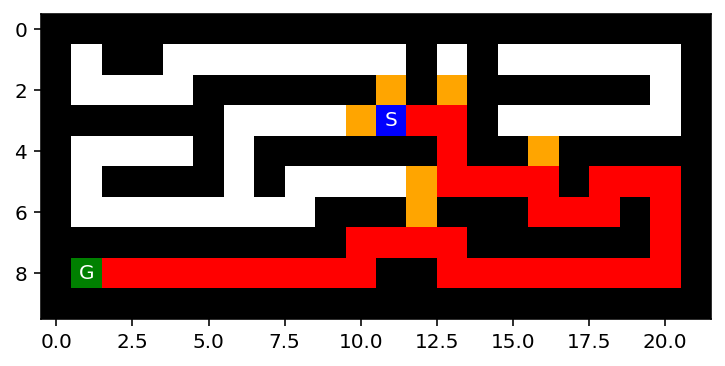

[38, 44, 38, 7, 7]

In [11]:
Search(f1,dfs)
# Search(f2,dfs)
# Search(f3,dfs)
# Search(f4,dfs)
# Search(f5,dfs)
# Search(f6,dfs)
# Search(f7,dfs)
# Search(f8,dfs)


How does BFS and DFS deal with loops (cycles)?

**Discussion**

- BFS: Using a list(reached) to store all the nodes that have been reached. Check every expanded node whether it is in the list before put it into frontier queue.
- DFS: Only check against the path from the root to the current node and the frontier to prevent cycles.


Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

**Discussion**
- BFS:
    - complete: yes
    - optimal:yes
    - time complexity: O(4*d)
    - space complexity:O(4^d)
- DFS:
    - complete: yes()
    - optimal:no
    - time complexity:O(4^m) 
    - space complexity:O(4^m)


## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

In [12]:
# Your code goes here
def best_first_search(maze,f):
    index = 0
    node = Node(maze.initial,None,None,0)
    
    frontier = queue.PriorityQueue()
    frontier.put((f(node,maze),index,node))
    
    reached ={node.pos:node}
    
    # Attributes used to compare with other search
    node_expanded = 1
    max_tree_depth = 1
    max_tree_size = 1
    max_frontier_size = 1

    while not frontier.empty():
        node = frontier.get()[2]

        # Set maze type
        if node.pos != maze.initial and node.pos not in maze.goal:
            maze.Set_maze(node.pos,".")
            
        if maze.Is_goal(node.pos):
            # Set attribute
            max_tree_size = len(reached)
            max_tree_depth = max(max_tree_depth,node.cost)
            
            # Set maze type
            for node in child.get_path_from_root():
                if node.pos != maze.initial and node.pos not in maze.goal:
                    maze.Set_maze(node.pos,"P")
                    
            return [node.cost,node_expanded,max_tree_depth,max_tree_size,max_frontier_size]

        for child in Expand(maze,node):
            s = child.pos
            if s not in reached or child.cost < reached[s].cost:
                index += 1
                reached[s] = child
                frontier.put((f(child,maze),index,child))
                
                # Set maze type
                if s != maze.initial and s not in maze.goal:
                    maze.Set_maze(s,"F")
                    
                # Set attribute
                node_expanded += 1
                max_tree_depth = max(max_tree_depth,child.cost)
                max_frontier_size = max(max_frontier_size,frontier.qsize())          

    return "Fail"

def greedy(maze):
    return best_first_search(maze,Node.manhattan_distance)

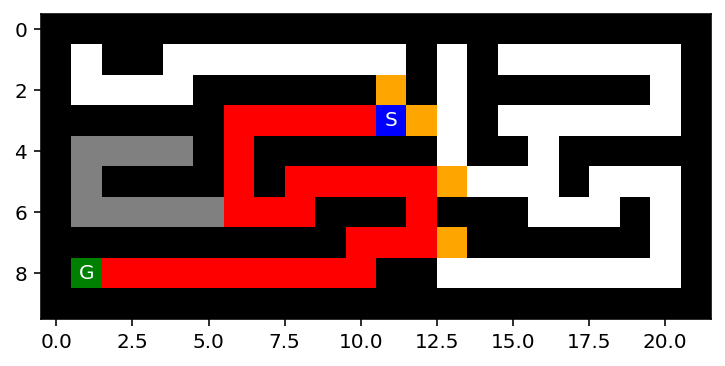

[30, 44, 30, 44, 5]

In [13]:
Search(f1,greedy)
# Search(f2,greedy)
# Search(f3,greedy)
# Search(f4,greedy)
# Search(f5,greedy)
# Search(f6,greedy)
# Search(f7,greedy)
# Search(f8,greedy)

In [14]:
def A_star(maze):
    return best_first_search(maze,Node.g_h)

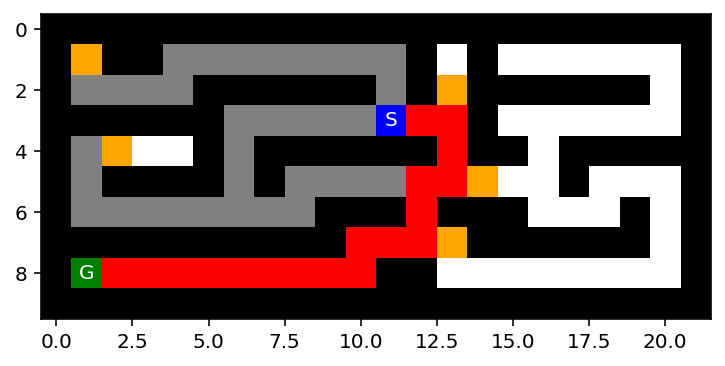

[20, 60, 20, 59, 8]

In [15]:
Search(f1,A_star)
# Search(f2,A_star)
# Search(f3,A_star)
# Search(f4,A_star)
# Search(f5,A_star)
# Search(f6,A_star)
# Search(f7,A_star)
# Search(f8,A_star)

Are your implementations complete and optimal? What is the time and space complexity?

**Answer**
- GBS:
    - complete: yes
    - optimal: no
    - time complexity: 
        - worst case: O(4^m)
        - best case: O(4\*m)
    - space complexity:
        - worst case: O(4^m)
        - best case: O(4\*m)
- A*:
    - complete: yes
    - optimal: yes
    - time complexity:
        - worst case: O(4^d)
        - best case: O(4\*d)
    - space complexity:
        - worst case: O(4^d)
        - best case: O(4\*d)

## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [16]:
# Add code

import numpy as np  
import pandas as pd

def compare_maze(f):
    res = []
    res.append(Search(f,bfs))
    res.append(Search(f,dfs))
    res.append(Search(f,greedy))
    res.append(Search(f,A_star))
    res = np.array(res)
    return res

def show_table(data):
    df = pd.DataFrame(data,index = ["BFS","DFS","GBS","A*"],columns = ["path cost", "# of nodes expanded","max tree depth","max # of nodes in memory","max frontier size"])
    return df


Complete the following table for each maze.

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |           |                |                |               |                   |
| DFS       |           |                |                |               |                   |
| GBS       |           |                |                |               |                   |
| A*        |           |                |                |               |                   |

__Medium Maze__

...

Small maze


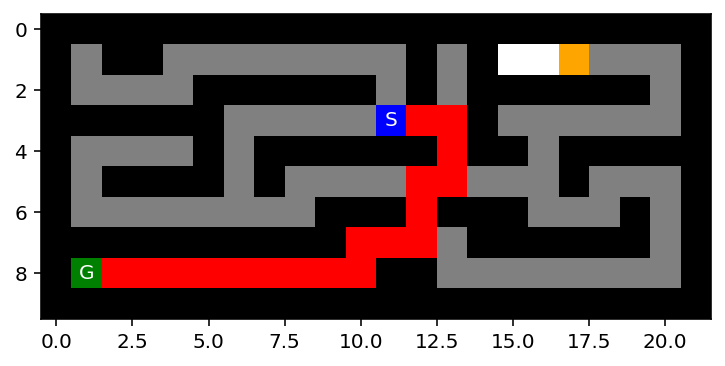

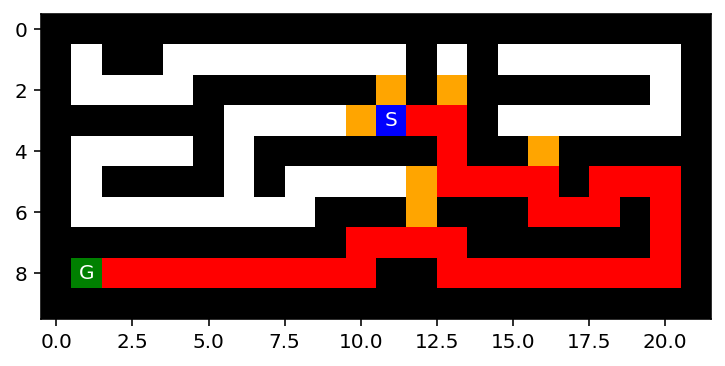

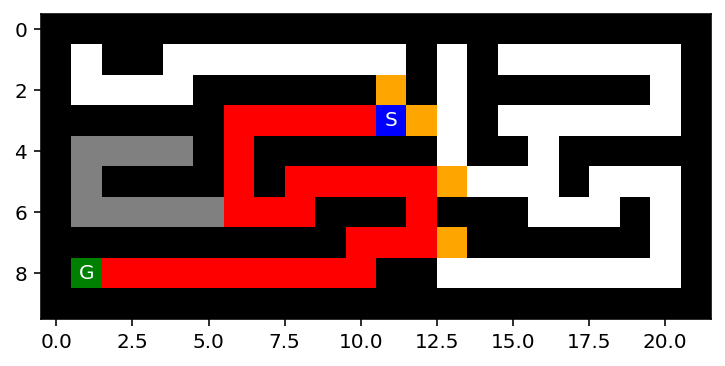

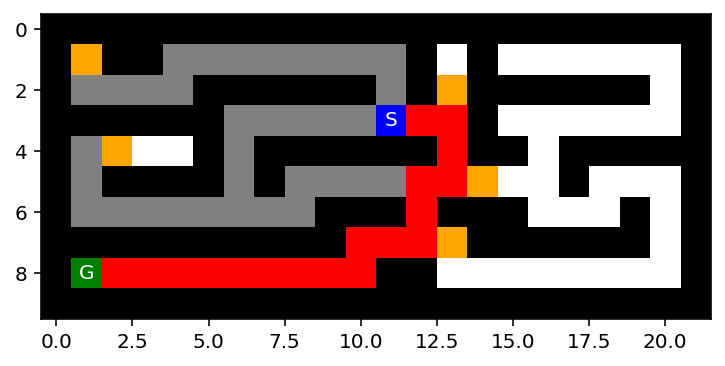

,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,20,91,20,91,8
DFS,38,44,38,7,7
GBS,30,44,30,44,5
A*,20,60,20,59,8


In [17]:
print("Small maze")
maze1 = compare_maze("small_maze.txt")
show_table(maze1)

Medium maze


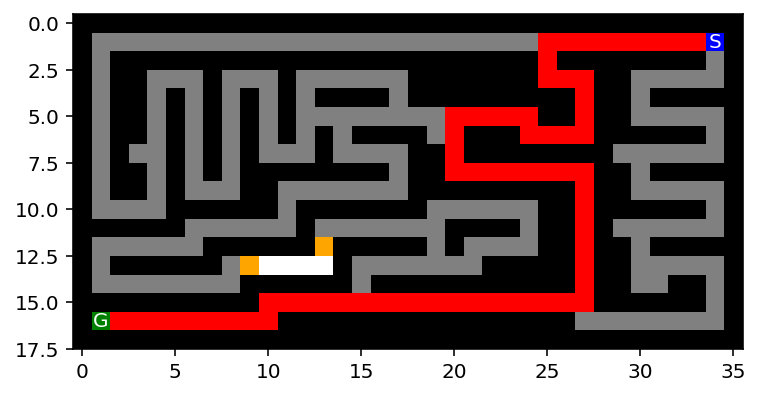

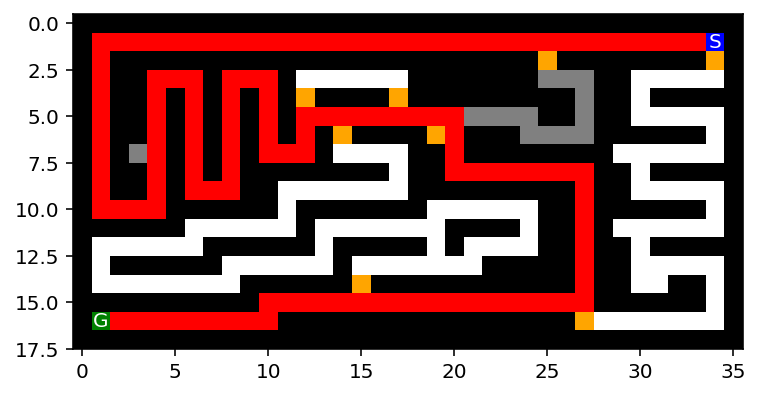

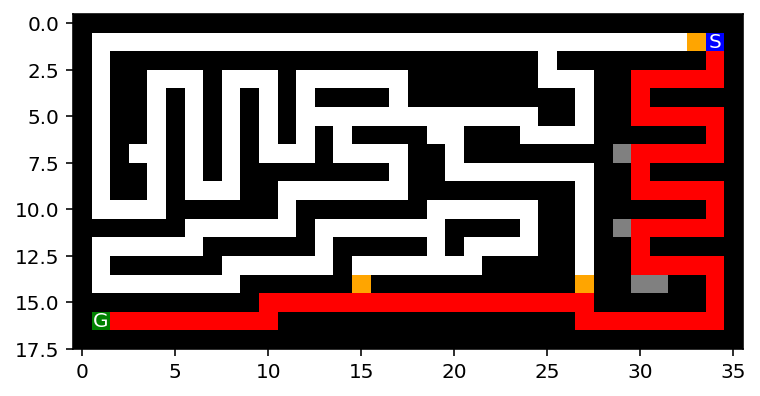

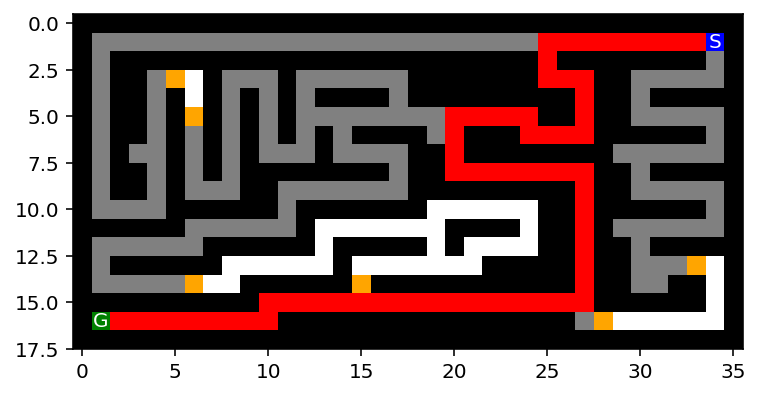

,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,69,269,69,269,8
DFS,131,155,131,9,9
GBS,75,82,75,82,4
A*,69,229,69,228,8


In [18]:
print("Medium maze")
maze2 = compare_maze("medium_maze.txt")
show_table(maze2)

Large maze


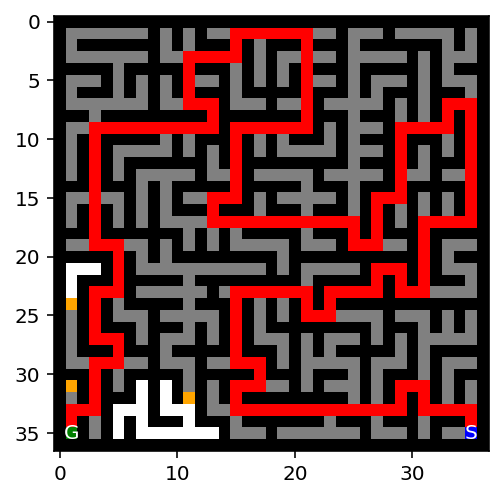

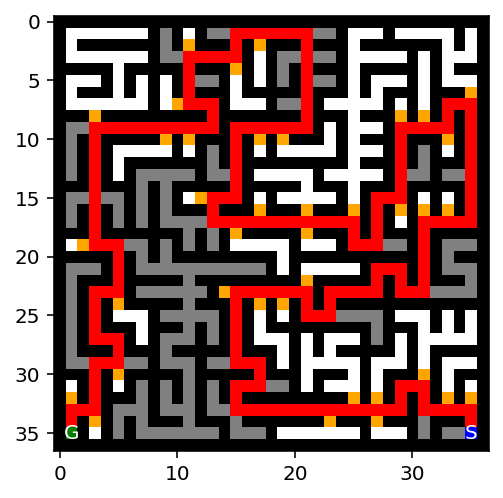

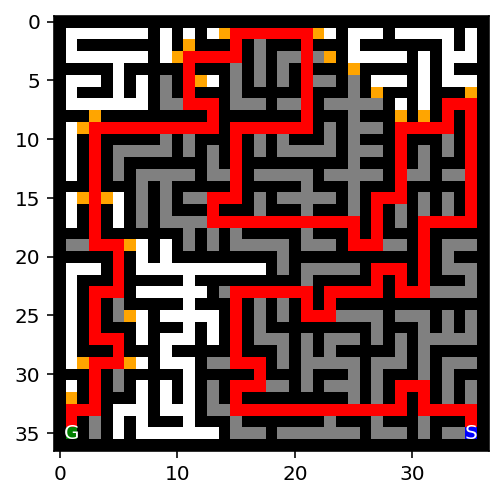

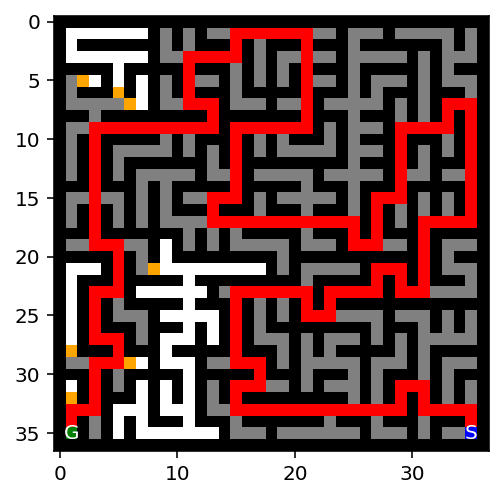

,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,211,620,211,620,8
DFS,211,426,223,39,39
GBS,211,487,211,487,21
A*,211,557,211,557,12


In [19]:
print("Large maze")
maze3 = compare_maze("large_maze.txt")
show_table(maze3)

Open maze


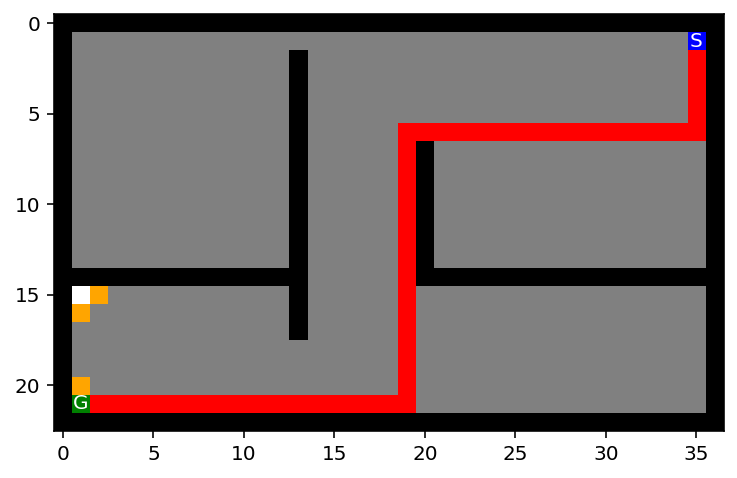

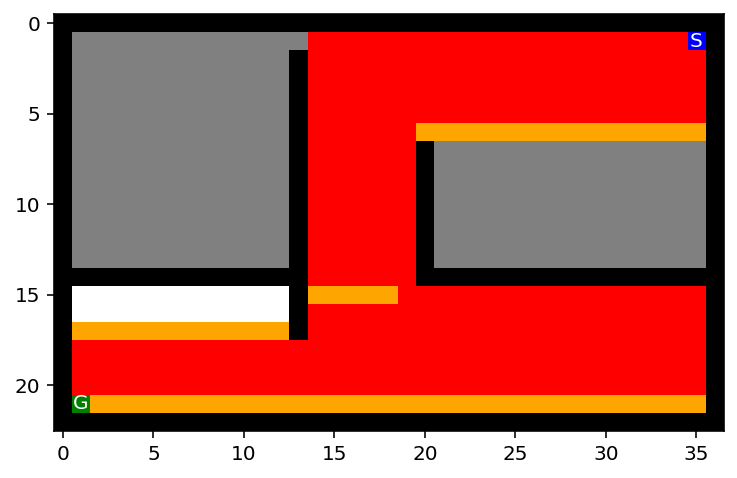

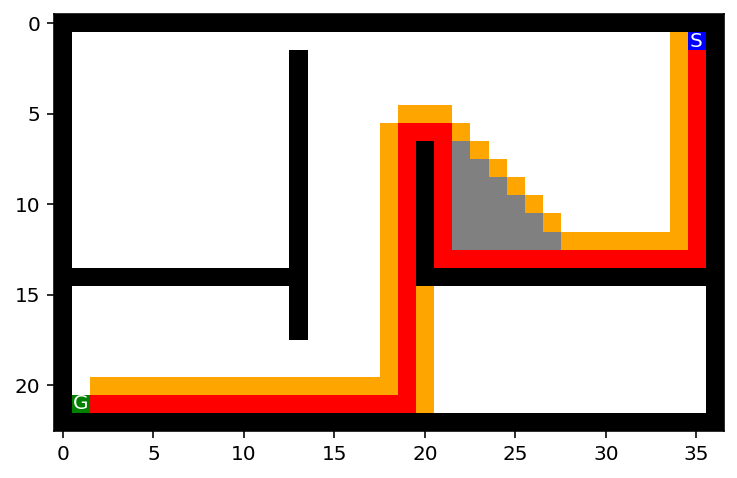

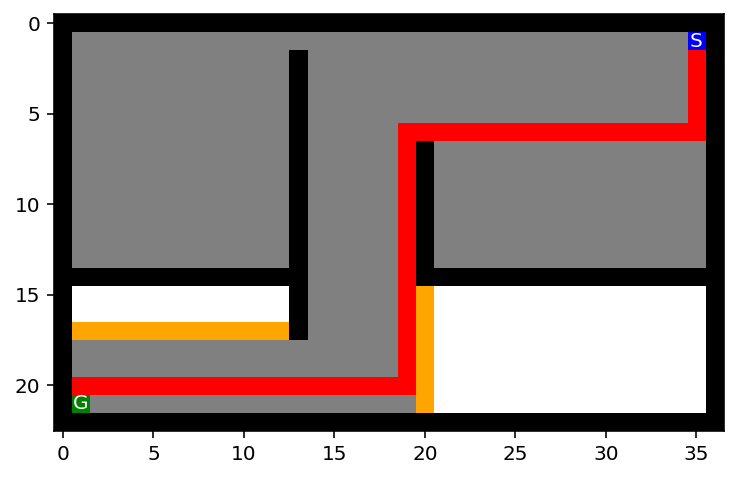

,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,55,682,55,682,25
DFS,331,1167,331,329,329
GBS,69,155,69,155,66
A*,55,555,55,555,25


In [20]:
print("Open maze")
maze4 = compare_maze("open_maze.txt")
show_table(maze4)

Wall maze


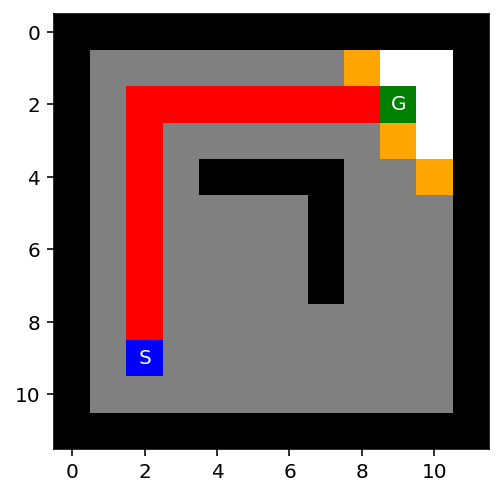

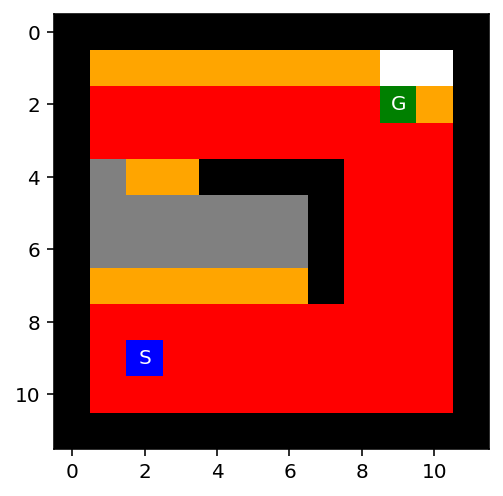

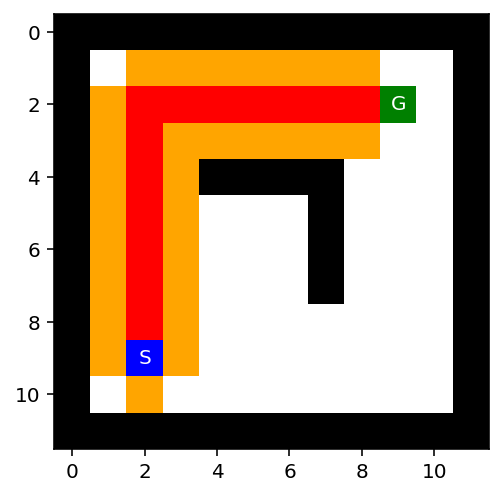

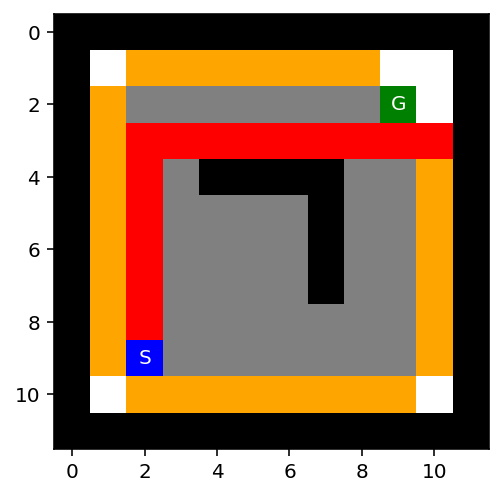

,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,15,88,15,88,11
DFS,61,351,73,60,60
GBS,15,43,15,43,29
A*,15,87,15,87,31


In [21]:
print("Wall maze")
maze5 = compare_maze("wall_maze.txt")
show_table(maze5)

Loops maze


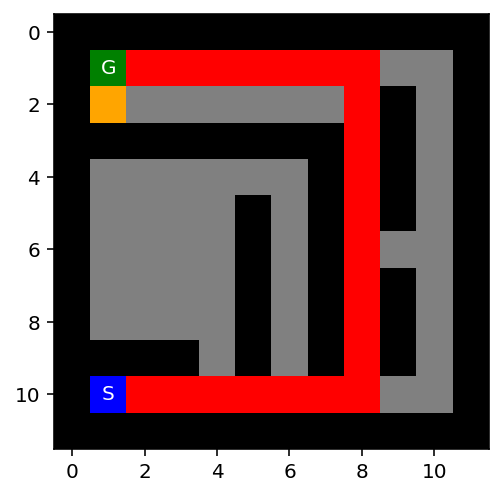

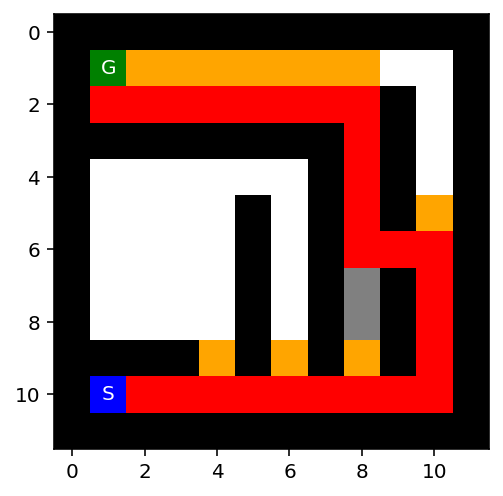

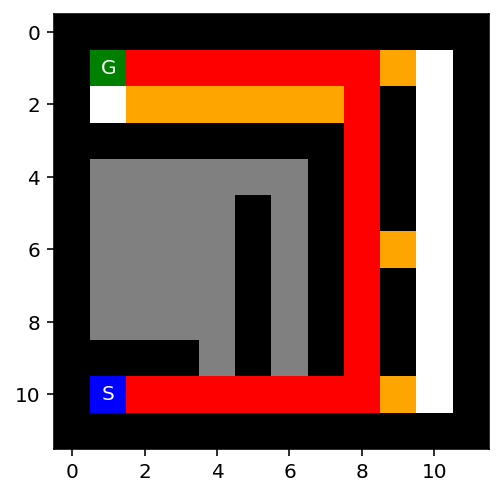

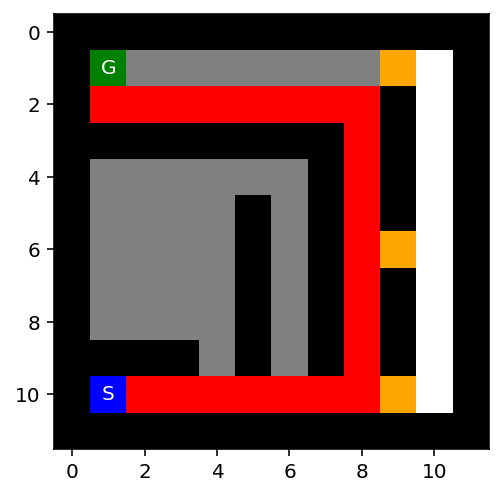

,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,24,71,24,71,8
DFS,28,42,28,12,12
GBS,24,86,24,61,10
A*,24,63,24,62,6


In [22]:
print("Loops maze")
maze6 = compare_maze("loops_maze.txt")
show_table(maze6)

Empty maze


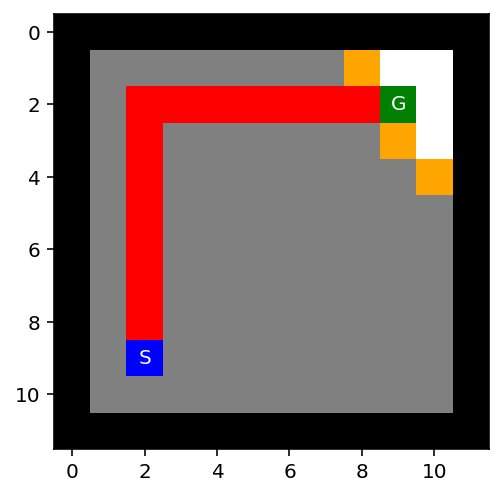

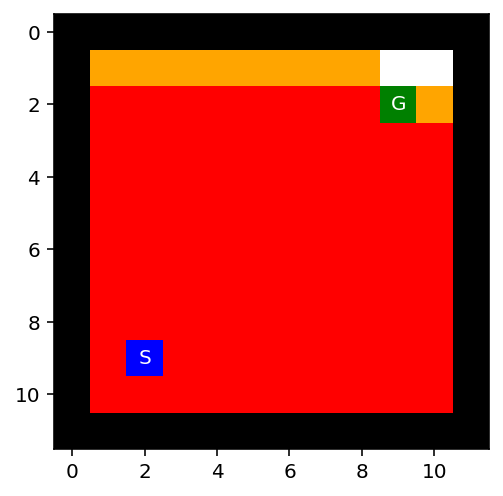

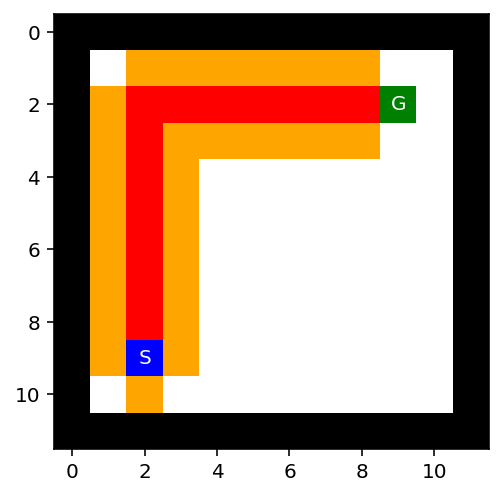

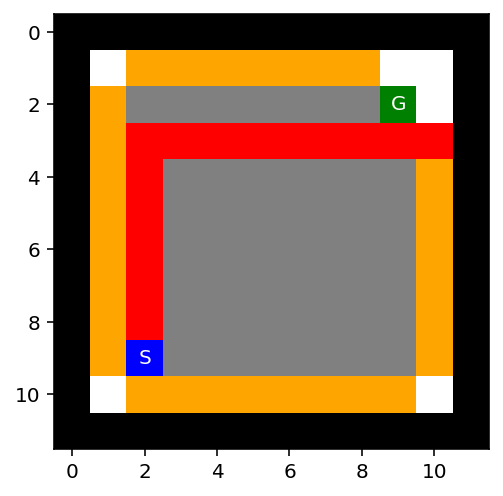

,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,15,95,15,95,12
DFS,89,169,89,81,81
GBS,15,43,15,43,29
A*,15,94,15,94,31


In [23]:
print("Empty maze")
maze7 = compare_maze("empty_maze.txt")
show_table(maze7)

Empty 2 maze


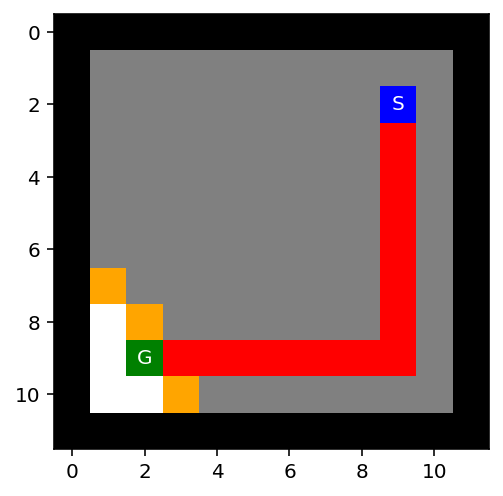

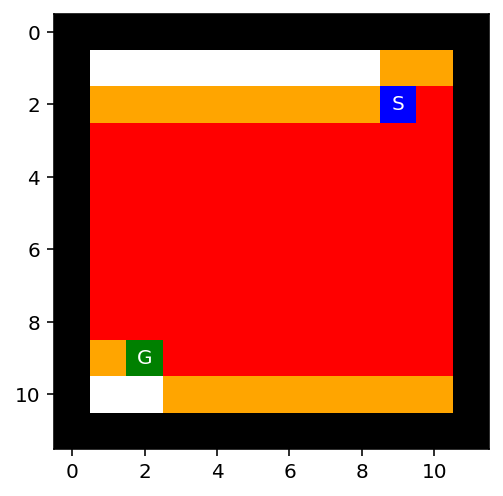

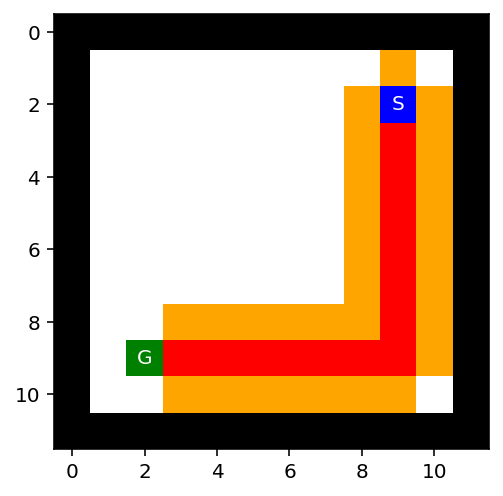

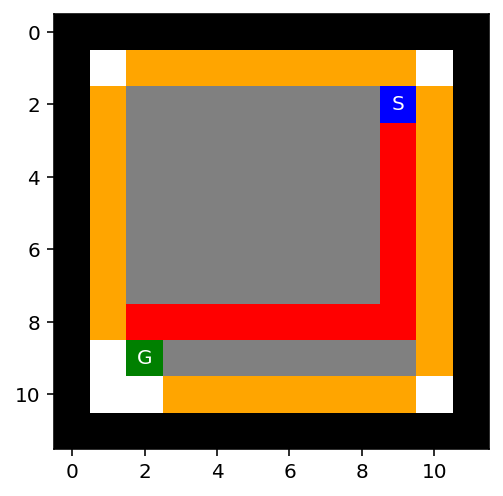

,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,15,95,15,95,12
DFS,71,145,71,75,75
GBS,15,43,15,43,29
A*,15,94,15,94,31


In [24]:
print("Empty 2 maze")
maze8 = compare_maze("empty_2_maze.txt")
show_table(maze8)

Present the results as using charts (see [Python Code Examples/charts and tables](../Python_Code_Examples/charts_and_tables.ipynb)). 

In [25]:
# Add charts
import matplotlib.pyplot as plt

maze_data = np.array([maze1,maze2,maze3,maze4,maze5,maze6,maze7,maze8])

def draw_bar(index,title):
    labels = ["Small","Medium","Large","Open","Wall","Loops","Empty","Empty2"]

    x = np.arange(len(labels))
    y1 = maze_data[:,0,index]
    y2 = maze_data[:,1,index]
    y3 = maze_data[:,2,index]
    y4 = maze_data[:,3,index]

    bar_width = 0.2

    plt.bar(x - 1.5*bar_width,y1,bar_width,label = "BFS")
    plt.bar(x - 0.5*bar_width,y2,bar_width,label = "DFS")
    plt.bar(x + 0.5*bar_width,y3,bar_width,label = "GBS")
    plt.bar(x + 1.5*bar_width,y4,bar_width,label = "A*")

    plt.title(title)
    plt.xticks(x,labels = labels)
    plt.legend()

    plt.show()


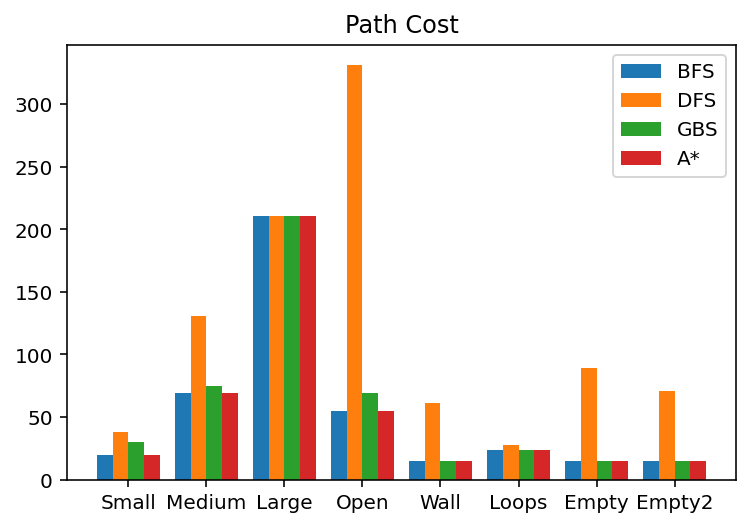

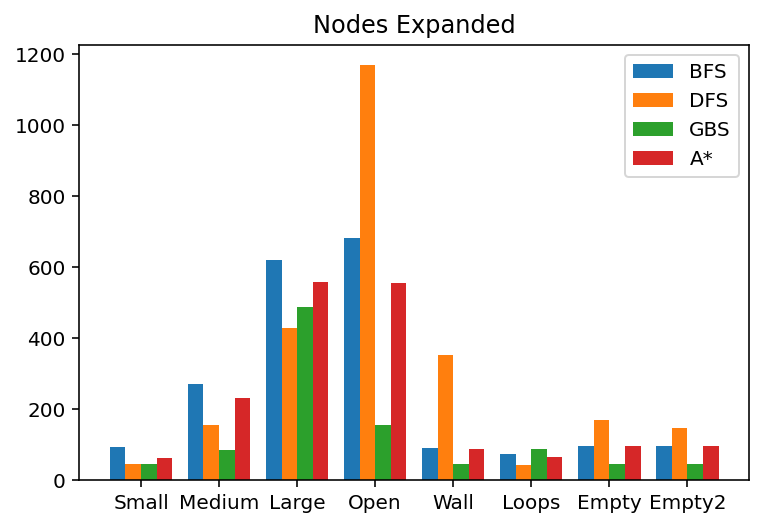

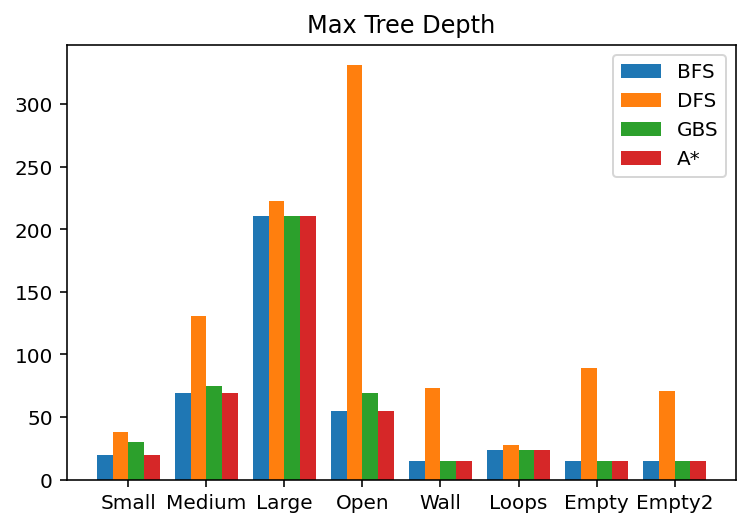

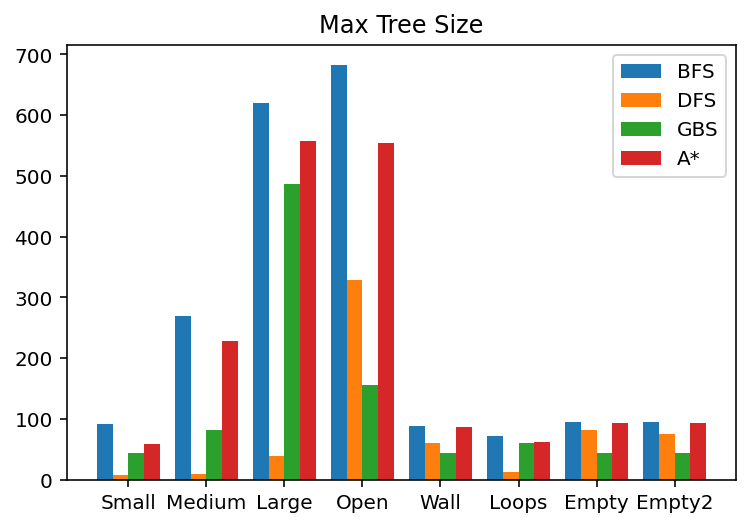

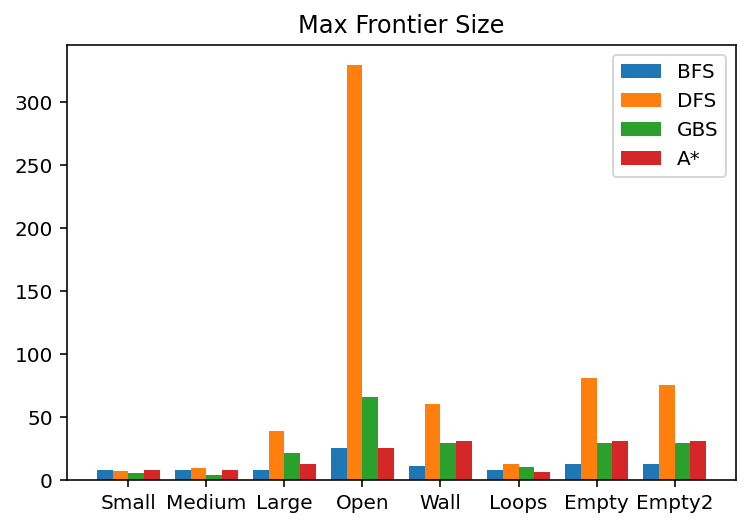

In [26]:
draw_bar(0,"Path Cost")
draw_bar(1,"Nodes Expanded")
draw_bar(2,"Max Tree Depth")
draw_bar(3,"Max Tree Size")
draw_bar(4,"Max Frontier Size")

Discuss the most important lessons you have learned from implementing the different search strategies. 

**Answer**

- A\* can always find the optimal solution while GBS sometime may not, but it expands more nodes and need more memory size.
- DFS costs far more memory than other search and it also expanded more nodes than others. It's because DFS always return the first path it found with formated action order. However, it uses much less space than other three implementations.
- BFS can also find the shortest path to the goal. But it costs more than A\*. On the other hand, the goodness of A\* Search depends on a good strategy(f(n)).

## Graduate student advanced task: Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [27]:
# Your code/answer goes here
import sys

def ids(maze):
    for depth in range(sys.maxsize):
        res = dfs(maze,depth)
        if res != "cutoff":
            return res

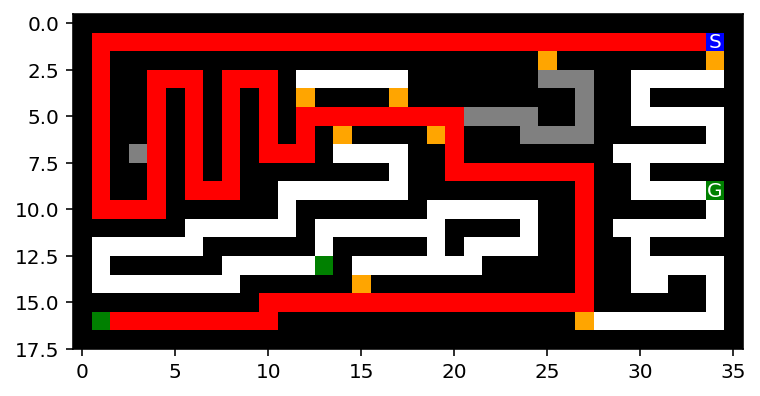

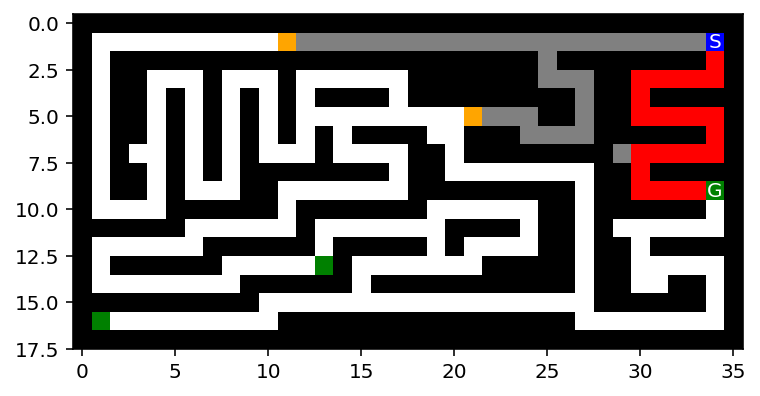

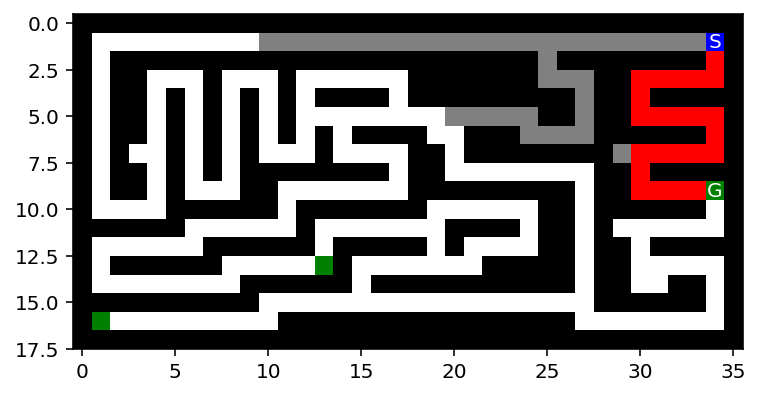

,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
DFS,131,155,131,9,9
BFS,25,62,25,62,4
IDS,25,65,25,3,3


In [28]:
f9 = "medium_maze_mutiple_goals.txt"

res = []

res.append(Search(f9,dfs))
res.append(Search(f9,bfs))
res.append(Search(f9,ids))
res = np.array(res)

df = pd.DataFrame(res,index = ["DFS","BFS","IDS"],columns = ["path cost", "# of nodes expanded","max tree depth","max # of nodes in memory","max frontier size"])
df

**Answer**
As the result, we can see that both BFS and IDS found the shortest path to the goal state. IDS expands less nodes and uses less memory, even less than DFS. Therefore, IDS can find optimal solution with less sapce cost. However, since IDS need to research lots of times, it may use more time than BFS.

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

**Answer**
We can compare the different paths between two intersections, and use the smallest path length as the path cost between the two interactions.


Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [29]:
# Your code/answer goes here
def A_star_weighted(maze):
    return best_first_search(maze,Node.g_wh)

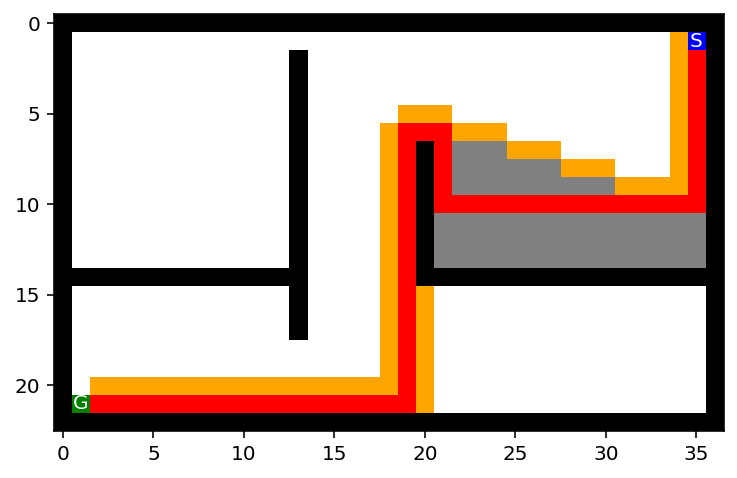

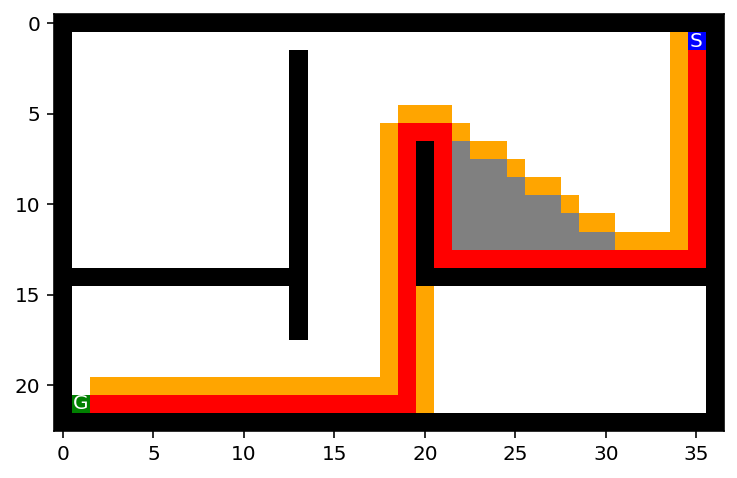

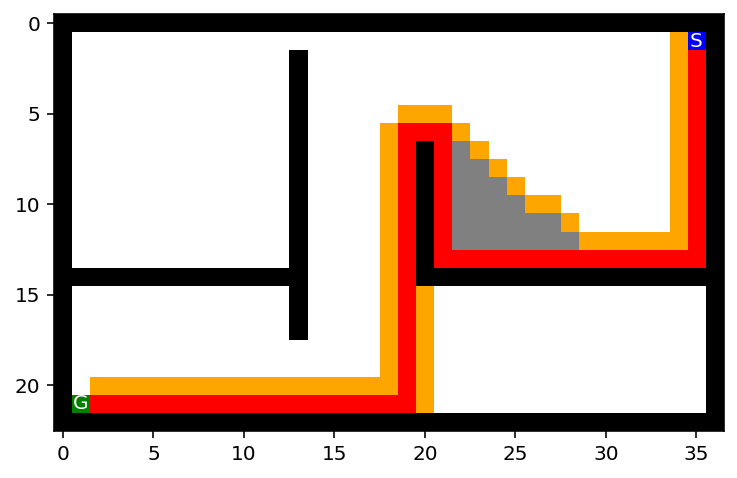

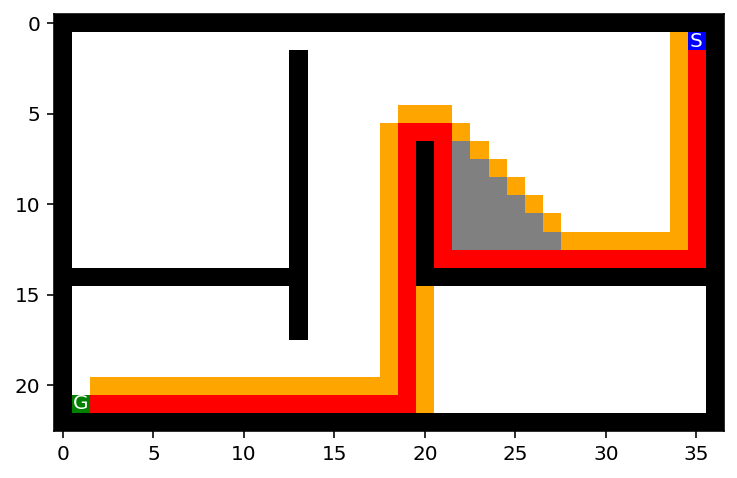

[69, 155, 69, 155, 66]

In [30]:
Node.set_w(2)
Search(f4,A_star_weighted)

Node.set_w(5)
Search(f4,A_star_weighted)

Node.set_w(10)
Search(f4,A_star_weighted)

Node.set_w(15)
Search(f4,A_star_weighted)

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

**Answer**

Agent can use sensor to get the position of walls, as procept of the environment. I will implment an agent which can remember all the paths that it has explored, and and after it has explored the whole maze, it can choose the shortest path to get to the goal. If the agent get a GPS device, then it can initial a maze and continuously change the maze in its memory during exploring the maze.